* Họ Tên: Hồ Thịnh
* MSSV: 19522274
* Lab01: Các mô hình Máy Học cho bài toán Regression

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/CS116/Lab/Pos_Salaries_Dataset/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#Data Preprocessing

In [31]:
base_features = dataset.iloc[:, 1:-1].values
labels = dataset.iloc[:, 2].values

In [15]:
base_features

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

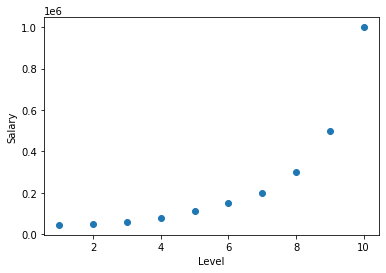

In [17]:
plt.scatter(base_features, labels)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Linear Regression with Polynomial Kernel

In [33]:
#polynomial kernal
polynomial_reg = PolynomialFeatures(degree=3)
polynomial_features = polynomial_reg.fit_transform(base_features)
polynomial_features

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [19]:
polynomial_reg.fit(polynomial_features, labels)

PolynomialFeatures(degree=3)

In [20]:
lr = LinearRegression()
lr.fit(polynomial_features, labels)

LinearRegression()

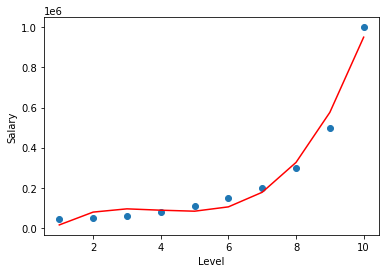

In [21]:
plt.scatter(base_features, labels)
plt.plot(base_features, lr.predict(polynomial_features), c='r')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [59]:
print("R^2 score for Linear Regresion + Poly on this dataset: ", lr.score(polynomial_features, labels))

R^2 score for Linear Regresion + Poly on this dataset:  0.9812097727913367


Ban đầu khi cài đặt Linear Regression không sử dụng Polynomial Kernal thì R^2 score của mô hình này chỉ đạt khoảng 67% nhưng sau khi cài đặt thêm kernel thì score tăng lên đáng kể, 98%

#Linear Regression with Random Forest Regressor

In [56]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(base_features, labels)

RandomForestRegressor(n_estimators=10, random_state=0)

In [57]:
X_grid = np.arange(min(base_features), max(base_features), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

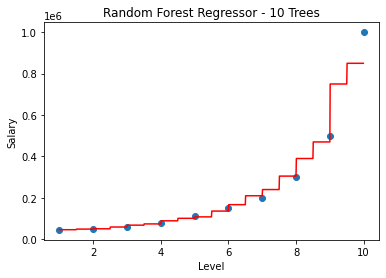

In [58]:
plt.scatter(base_features, labels)
plt.plot(X_grid, regressor.predict(X_grid), c = 'r')
plt.title("Random Forest Regressor - 10 Trees")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [61]:
print("R^2 score for Linear Regression + Random Forest on this dataset: ", regressor.score(base_features, labels))

R^2 score for Linear Regression + Random Forest on this dataset:  0.9704434230386582



# SVR with Polynomial kernel

In [52]:
svr = SVR(kernel='poly', C=10.0, gamma="auto")
svr.fit(base_features, labels)

SVR(C=10.0, gamma='auto', kernel='poly')

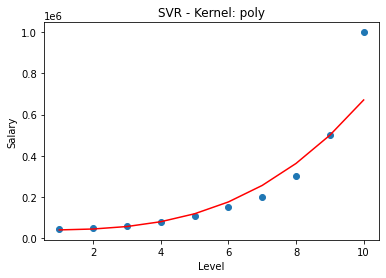

In [53]:
plt.scatter(base_features, labels)
plt.plot(base_features, svr.predict(base_features), c='r')
plt.title("SVR - Kernel: poly")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [54]:
print("R^2 score for SVR on this dataset: ", svr.score(base_features, labels))

R^2 score for SVR on this dataset:  0.8561023950379358


Cài đặt SVR+Poly hoạt động khá hiệu quả, R^2 score lên đến 85.6% tuy nhiên theo như biểu đồ thì vẫn có một điểm nằm ở góc phải trên nằm riêng hoàn toàn, đây là điểm biểu thị cho level CEO và khả năng cao mô hình này không phân loại được những trường hợp thuộc level này